# Bedmachine Grids
**Description:**  Gridded data in EPSG 3031 projection. Topographic layers, uncertainties, and masks.

Requires an EarthData login, see [link](../../how_to/download_NASA_data.ipynb) for how to configure this. 

**Dataset:** 

Morlighem, M. “MEaSUREs BedMachine Antarctica, Version 3.” NASA Snow and Ice Data Center Distributed Active Archive Center, 2022. https://nsidc.org/data/nsidc-0756/versions/3.

**Associated paper:** 

Morlighem, Mathieu, Eric Rignot, Tobias Binder, Donald Blankenship, Reinhard Drews, Graeme Eagles, Olaf Eisen, et al. “Deep Glacial Troughs and Stabilizing Ridges Unveiled beneath the Margins of the Antarctic Ice Sheet.” Nature Geoscience 13, no. 2 (2020): 132–37. https://doi.org/10.1038/s41561-019-0510-8.



In [1]:
%%capture
%load_ext autoreload
%autoreload 2


from polartoolkit import fetch, maps, regions, utils

In [9]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # uncertainties
    "errbed",
    # others
    "ice_thickness",
    "dataid",
    "firn",
    "geoid",
    "mask",
    "source",
]

grids = []
for name in layer_names:
    data = fetch.bedmachine(
        layer=name,
        hemisphere="south",
        # available options
        # reference ("eigen-6c4" or "ellipsoid")
        # region,
        spacing=5000,  # spacing in meters
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for surface
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: 0.0
grid zmax: 4478.62060547
grid registration: g
##########
Info for icebase
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: -3722.05761719
grid zmax: 4477.27294922
grid registration: g
##########
Info for bed
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: -8055.88720703
grid zmax: 4477.27294922
grid registration: g
##########
Info for errbed
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: 10.0
grid zmax: 1000.0
grid registration: g
##########
Info for ice_thickness
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: 0.0
grid zmax: 4583.71435547
grid registration: g
##########
Info for dataid
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: 0.0
grid zmax

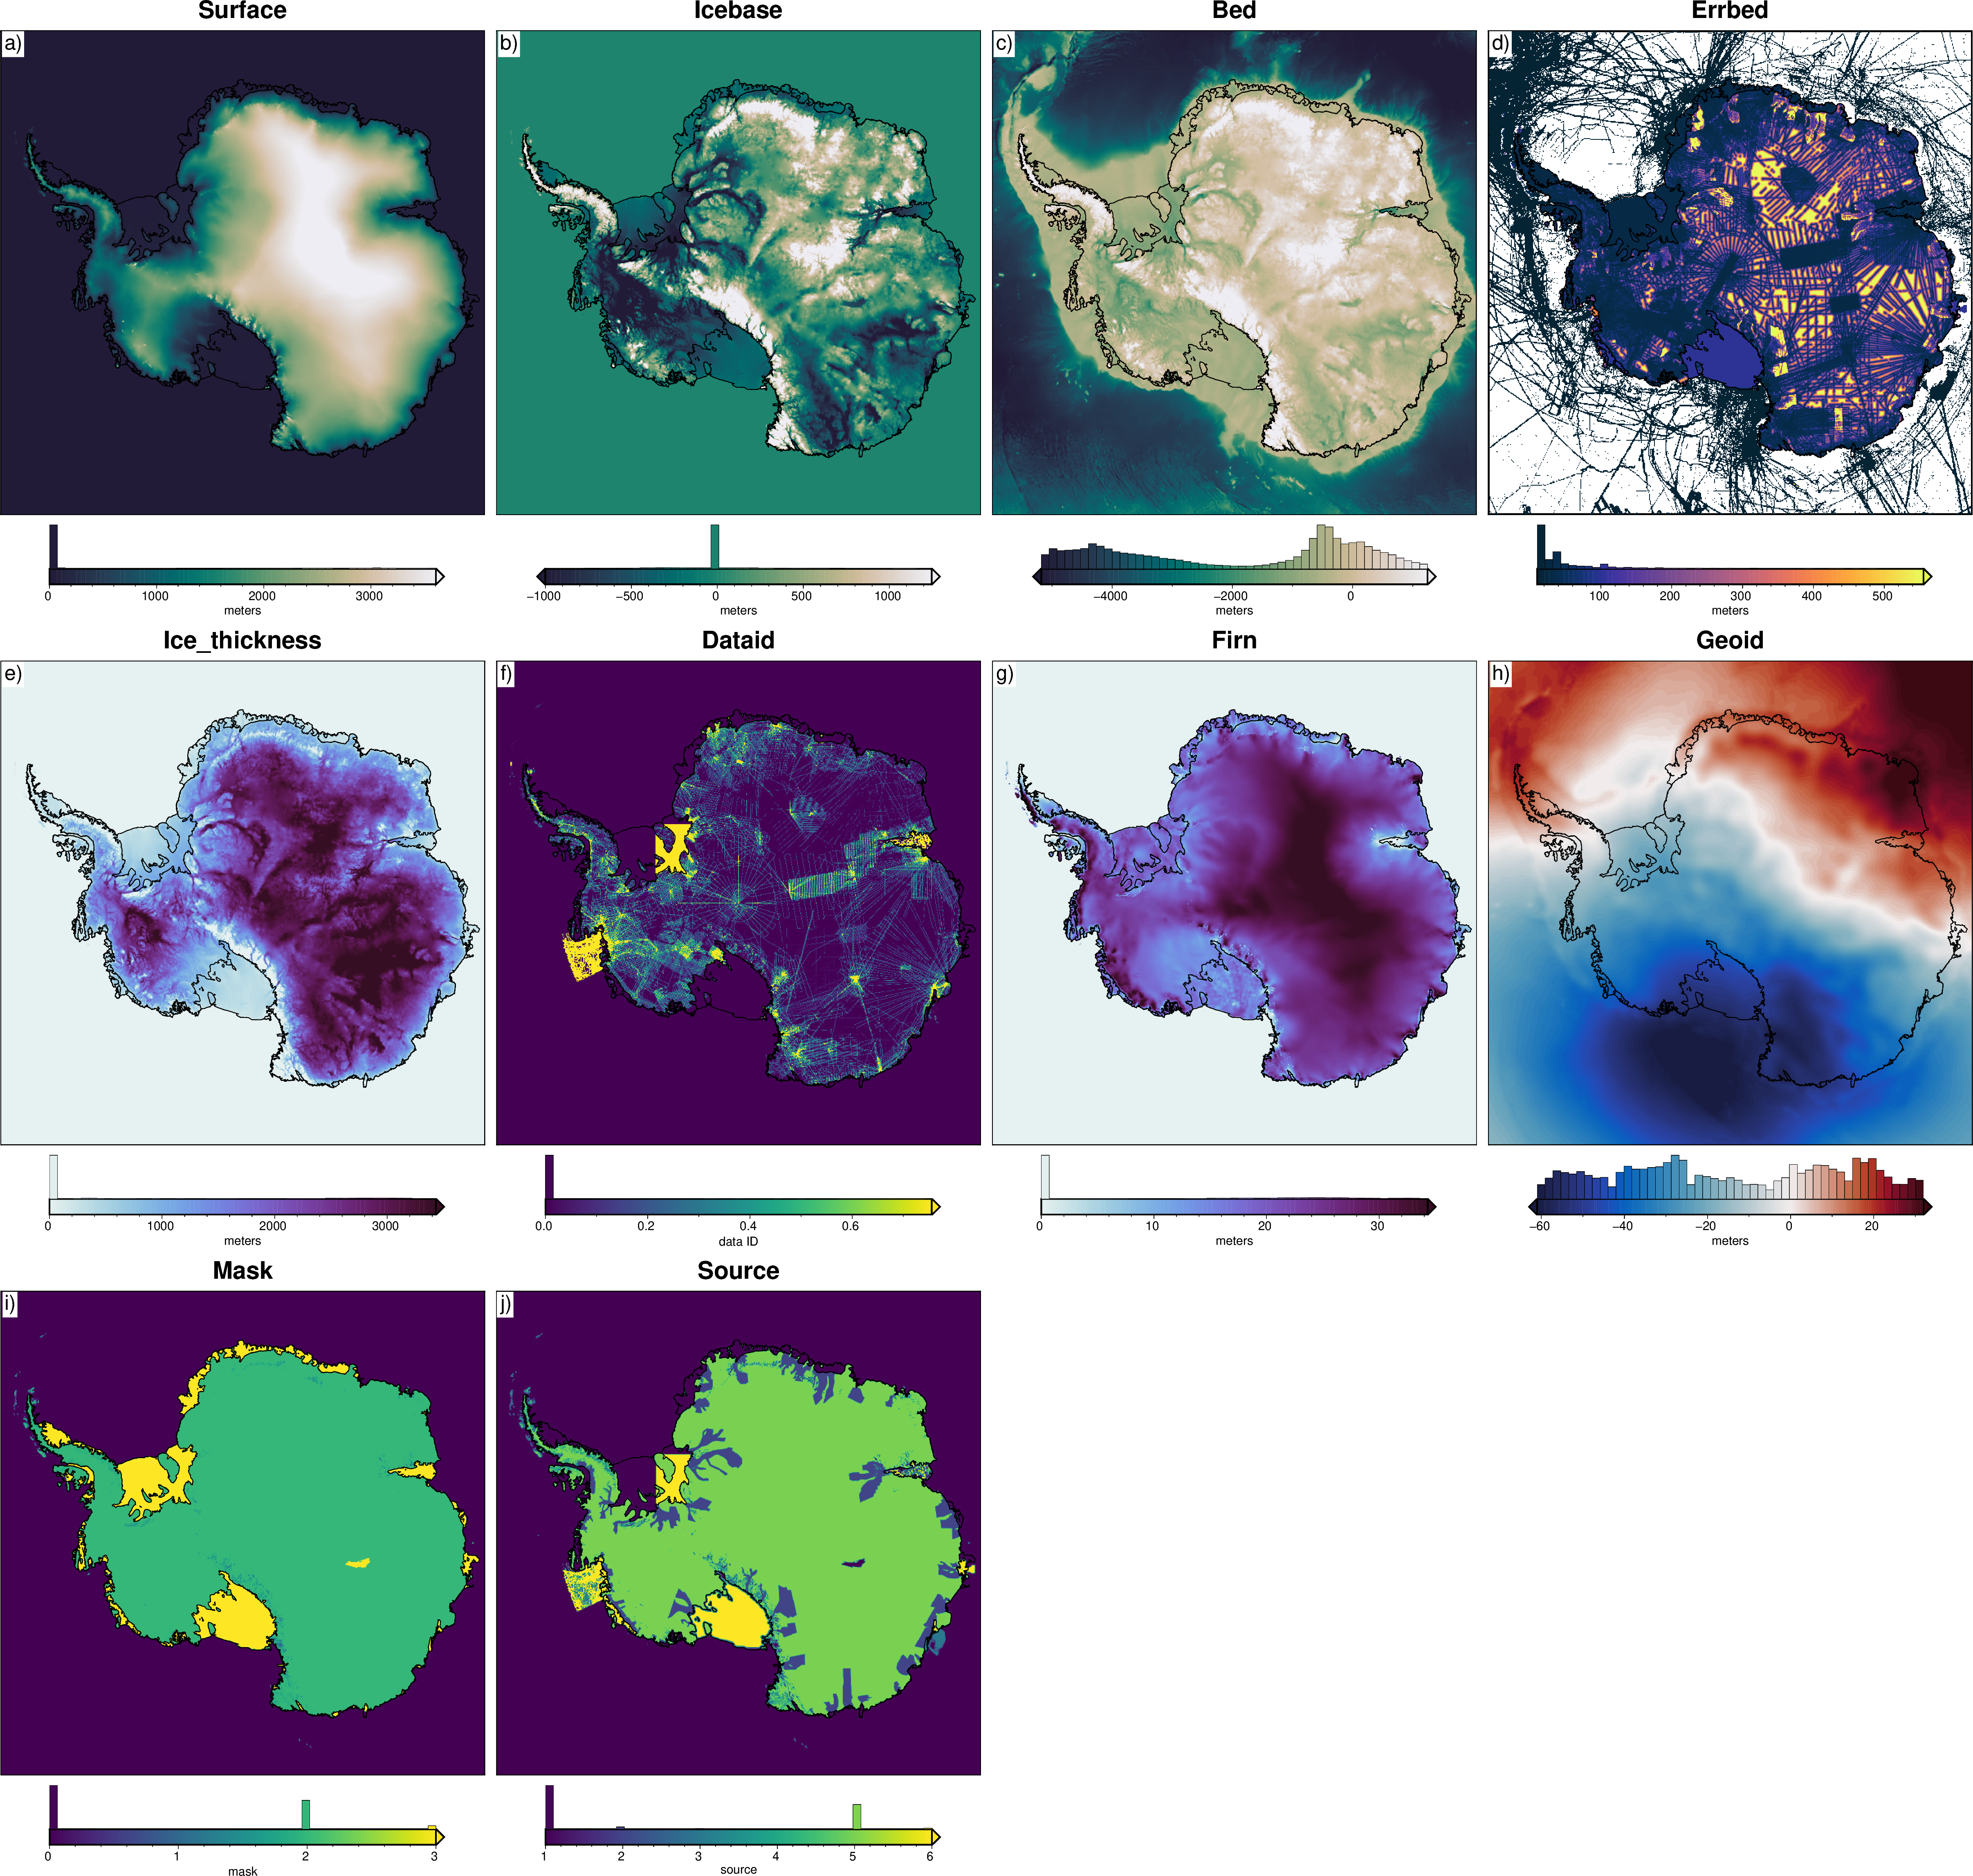

In [ ]:
cmaps = [
    "rain",
    "rain",
    "rain",
    "thermal",
    "dense",
    "viridis",
    "dense",
    "balance+h0",
    "viridis",
    "viridis",
]
cbar_labels = ["meters"] * 5 + ["data ID", "meters", "meters", "mask", "source"]

reverse_cpts = [True] * 3 + [False] * 7

fig = maps.subplots(
    grids,
    titles=[t.capitalize() for t in layer_names],
    cmaps=cmaps,
    reverse_cpts=reverse_cpts,
    cbar_labels=cbar_labels,
    region=regions.antarctica,
    hist=True,
    coast=True,
    robust=True,
    hemisphere="south",
)

fig.show(dpi=200)